In [21]:
# Cargamos las librerias necesarias 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Cargamos en la version llamada data la informacion del CSV

dataRegresionLogistica = pd.read_csv("C:/Users/HP 1000 NOTEBOOK PC/OneDrive/Desktop/UNAD_INGENIERIA DE SISTEMAS/PERIODO V/ANALISIS DE DATOS/FASE 2/framingham.csv")

In [3]:
# Desplegamos el archivo 
dataRegresionLogistica.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dataRegresionLogistica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
# Vamos a ver algunos valores nulos

dataRegresionLogistica.isnull().sum()[dataRegresionLogistica.isnull().sum()>0].sort_values(ascending = False)

glucose       388
education     105
BPMeds         53
totChol        50
cigsPerDay     29
BMI            19
heartRate       1
dtype: int64

In [6]:
# Columnas nulas
nullCols = ["glucose", "education", "BPMeds", "totChol", "cigsPerDay", "BMI", "heartRate"] 

In [7]:
# Se consulta el numero de filas
len(dataRegresionLogistica)

4238

In [14]:
# Se completa los valores valtantes
# Se utiliza para los datos distribuidos la media, mediana o moda, pero para los datos asimétricos se utiliza la mediana.

dataRegresionLogistica['education_mean'] = dataRegresionLogistica['education'].fillna(dataRegresionLogistica['education'].mean())
dataRegresionLogistica['education_median'] = dataRegresionLogistica['education'].fillna(dataRegresionLogistica['education'].median())
dataRegresionLogistica['education_mode'] = dataRegresionLogistica['education'].fillna(1)

dataRegresionLogistica['BPMeds_mean'] = dataRegresionLogistica['BPMeds'].fillna(dataRegresionLogistica['BPMeds'].mean())
dataRegresionLogistica['BPMeds_median'] = dataRegresionLogistica['BPMeds'].fillna(dataRegresionLogistica['BPMeds'].median())
dataRegresionLogistica['BPMeds_mode'] = dataRegresionLogistica['BPMeds'].fillna(1)

dataRegresionLogistica['totChol_mean'] = dataRegresionLogistica['totChol'].fillna(dataRegresionLogistica['totChol'].mean())
dataRegresionLogistica['totChol_median'] = dataRegresionLogistica['totChol'].fillna(dataRegresionLogistica['totChol'].median())
dataRegresionLogistica['totChol_mode'] = dataRegresionLogistica['totChol'].fillna(1)

dataRegresionLogistica['cigsPerDay_mean'] = dataRegresionLogistica['cigsPerDay'].fillna(dataRegresionLogistica['cigsPerDay'].mean())
dataRegresionLogistica['cigsPerDay_median'] = dataRegresionLogistica['cigsPerDay'].fillna(dataRegresionLogistica['cigsPerDay'].median())
dataRegresionLogistica['cigsPerDay_mode'] = dataRegresionLogistica['cigsPerDay'].fillna(1)

dataRegresionLogistica['BMI_mean'] = dataRegresionLogistica['BMI'].fillna(dataRegresionLogistica['BMI'].mean())
dataRegresionLogistica['BMI_median'] = dataRegresionLogistica['BMI'].fillna(dataRegresionLogistica['BMI'].median())
dataRegresionLogistica['BMI_mode'] = dataRegresionLogistica['BMI'].fillna(1)

dataRegresionLogistica['heartRate_mean'] = dataRegresionLogistica['heartRate'].fillna(dataRegresionLogistica['heartRate'].mean())
dataRegresionLogistica['heartRate_median'] = dataRegresionLogistica['heartRate'].fillna(dataRegresionLogistica['heartRate'].median())
dataRegresionLogistica['heartRate_mode'] =  dataRegresionLogistica['heartRate'].fillna(1)

dataRegresionLogistica['glucose_mean'] = dataRegresionLogistica['glucose'].fillna(dataRegresionLogistica['glucose'].mean())
dataRegresionLogistica['glucose_median'] = dataRegresionLogistica['glucose'].fillna(dataRegresionLogistica['glucose'].median())
dataRegresionLogistica['glucose_mode'] = dataRegresionLogistica['glucose'].fillna(1)

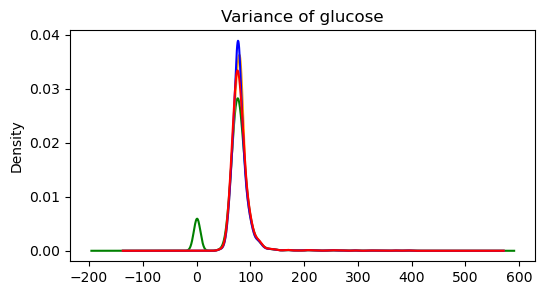

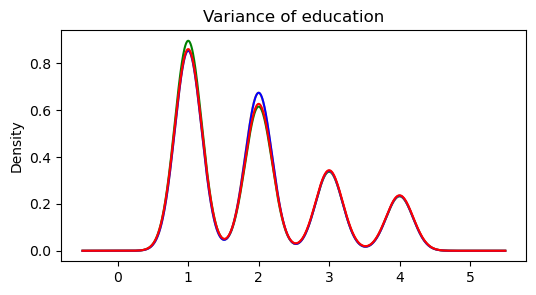

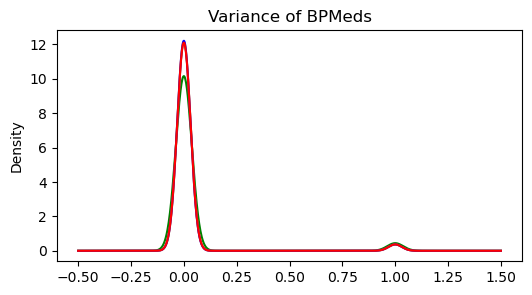

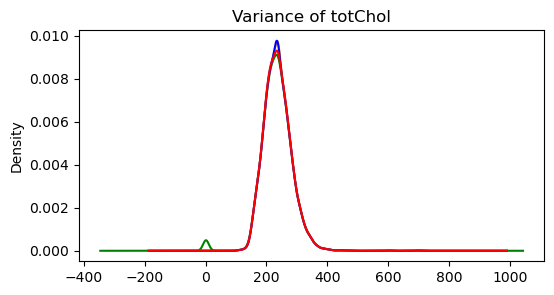

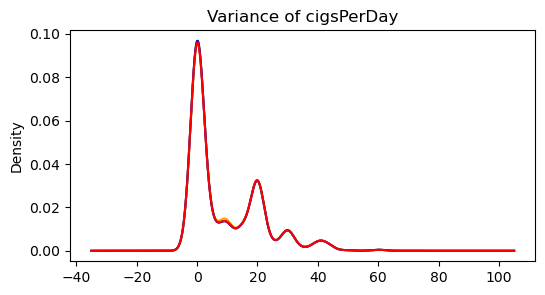

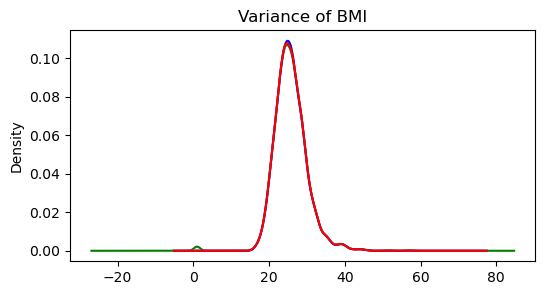

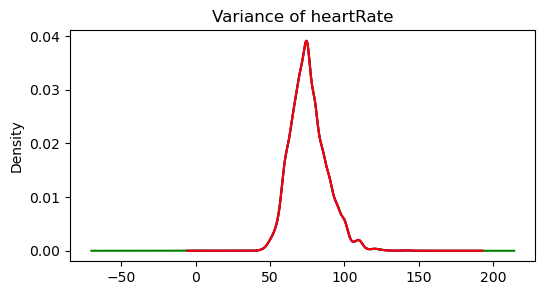

In [13]:
# Se verefica la varianza

def checkVariance(idx, col):
    fig=plt.figure(figsize = (6, 3))
    ax = fig.add_subplot(111)
    plt.title(label = f"Variance of {col}")
    dataRegresionLogistica [col+"_mode"].plot.density(ax = ax, color = "green")
    dataRegresionLogistica [col+"_mean"].plot.density(ax = ax, color = "orange")
    dataRegresionLogistica [col+"_median"].plot.density(ax = ax, color = "blue")
    dataRegresionLogistica [col].plot.density(ax = ax, color = "red")
for idx, col in enumerate(nullCols):
    checkVariance(idx, col)


In [23]:
# Cargue aleatorio para la columna de glucosa

dataRegresionLogistica["glucose_ran"] = dataRegresionLogistica["glucose"]
dataRegresionLogistica["glucose_ran"] [dataRegresionLogistica["glucose_ran"].isnull()] = dataRegresionLogistica["glucose_ran"].dropna().sample(n = dataRegresionLogistica["glucose_ran"].isnull().sum(),random_state = 1).values


<Axes: ylabel='Density'>

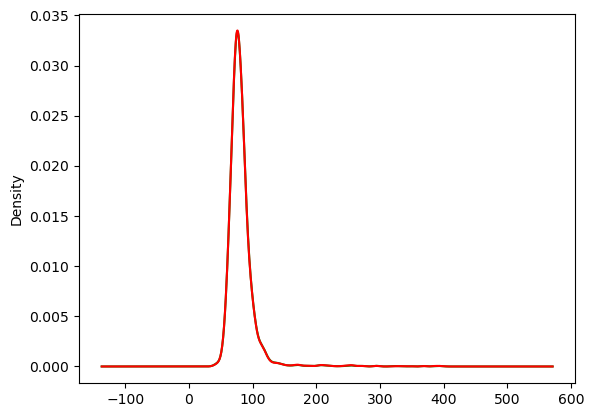

In [25]:
# Se verifica la Grafica glucosa
fig = plt.figure()
ax = fig.add_subplot(111)
dataRegresionLogistica["glucose"].plot.density(ax = ax, color = "green")
dataRegresionLogistica["glucose_ran"].plot.density(ax = ax, color = "red")

In [27]:
# Se crea un nuevo marco de datos, la distribución y la varianza no cambian

dataRegresionLogistica.columns.sort_values(ascending = True)

Index(['BMI', 'BMI_mean', 'BMI_median', 'BMI_mode', 'BPMeds', 'BPMeds_mean',
       'BPMeds_median', 'BPMeds_mode', 'TenYearCHD', 'age', 'cigsPerDay',
       'cigsPerDay_mean', 'cigsPerDay_median', 'cigsPerDay_mode',
       'currentSmoker', 'diaBP', 'diabetes', 'education', 'education_mean',
       'education_median', 'education_mode', 'glucose', 'glucose_mean',
       'glucose_median', 'glucose_mode', 'glucose_ran', 'heartRate',
       'heartRate_mean', 'heartRate_median', 'heartRate_mode', 'male',
       'prevalentHyp', 'prevalentStroke', 'sysBP', 'totChol', 'totChol_mean',
       'totChol_median', 'totChol_mode'],
      dtype='object')

In [24]:
Principal_dataRegresionLogistica = dataRegresionLogistica[["BMI_mean","BPMeds_mean","TenYearCHD","age","cigsPerDay_mean","currentSmoker","diaBP","diabetes","education_mean","glucose_ran","heartRate_mean", "male","prevalentHyp","prevalentStroke","sysBP","totChol_mean"]]

NameError: name 'dataRegresionLogistica' is not defined

In [23]:
rename_dataRegresionLogistica = {"BMI_mean":"BMI","BPMeds_mean":"BPMeds","cigsPerDay_mean":"cigsPerDay" ,"education_mean":"education","glucose_ran":"glucose","heartRate_mean":"heartRate" ,"totChol_mean":"totChol"}
Principal_dataRegresionLogistica.rename(columns = rename_dataRegresionLogistica,inplace=True)
Principal_dataRegresionLogistica.head()

NameError: name 'main_dataRegresionLogistica' is not defined

In [33]:
# Se compara para saber si hay datos duplicados

dataRegresionLogistica[dataRegresionLogistica.duplicated()].size

0

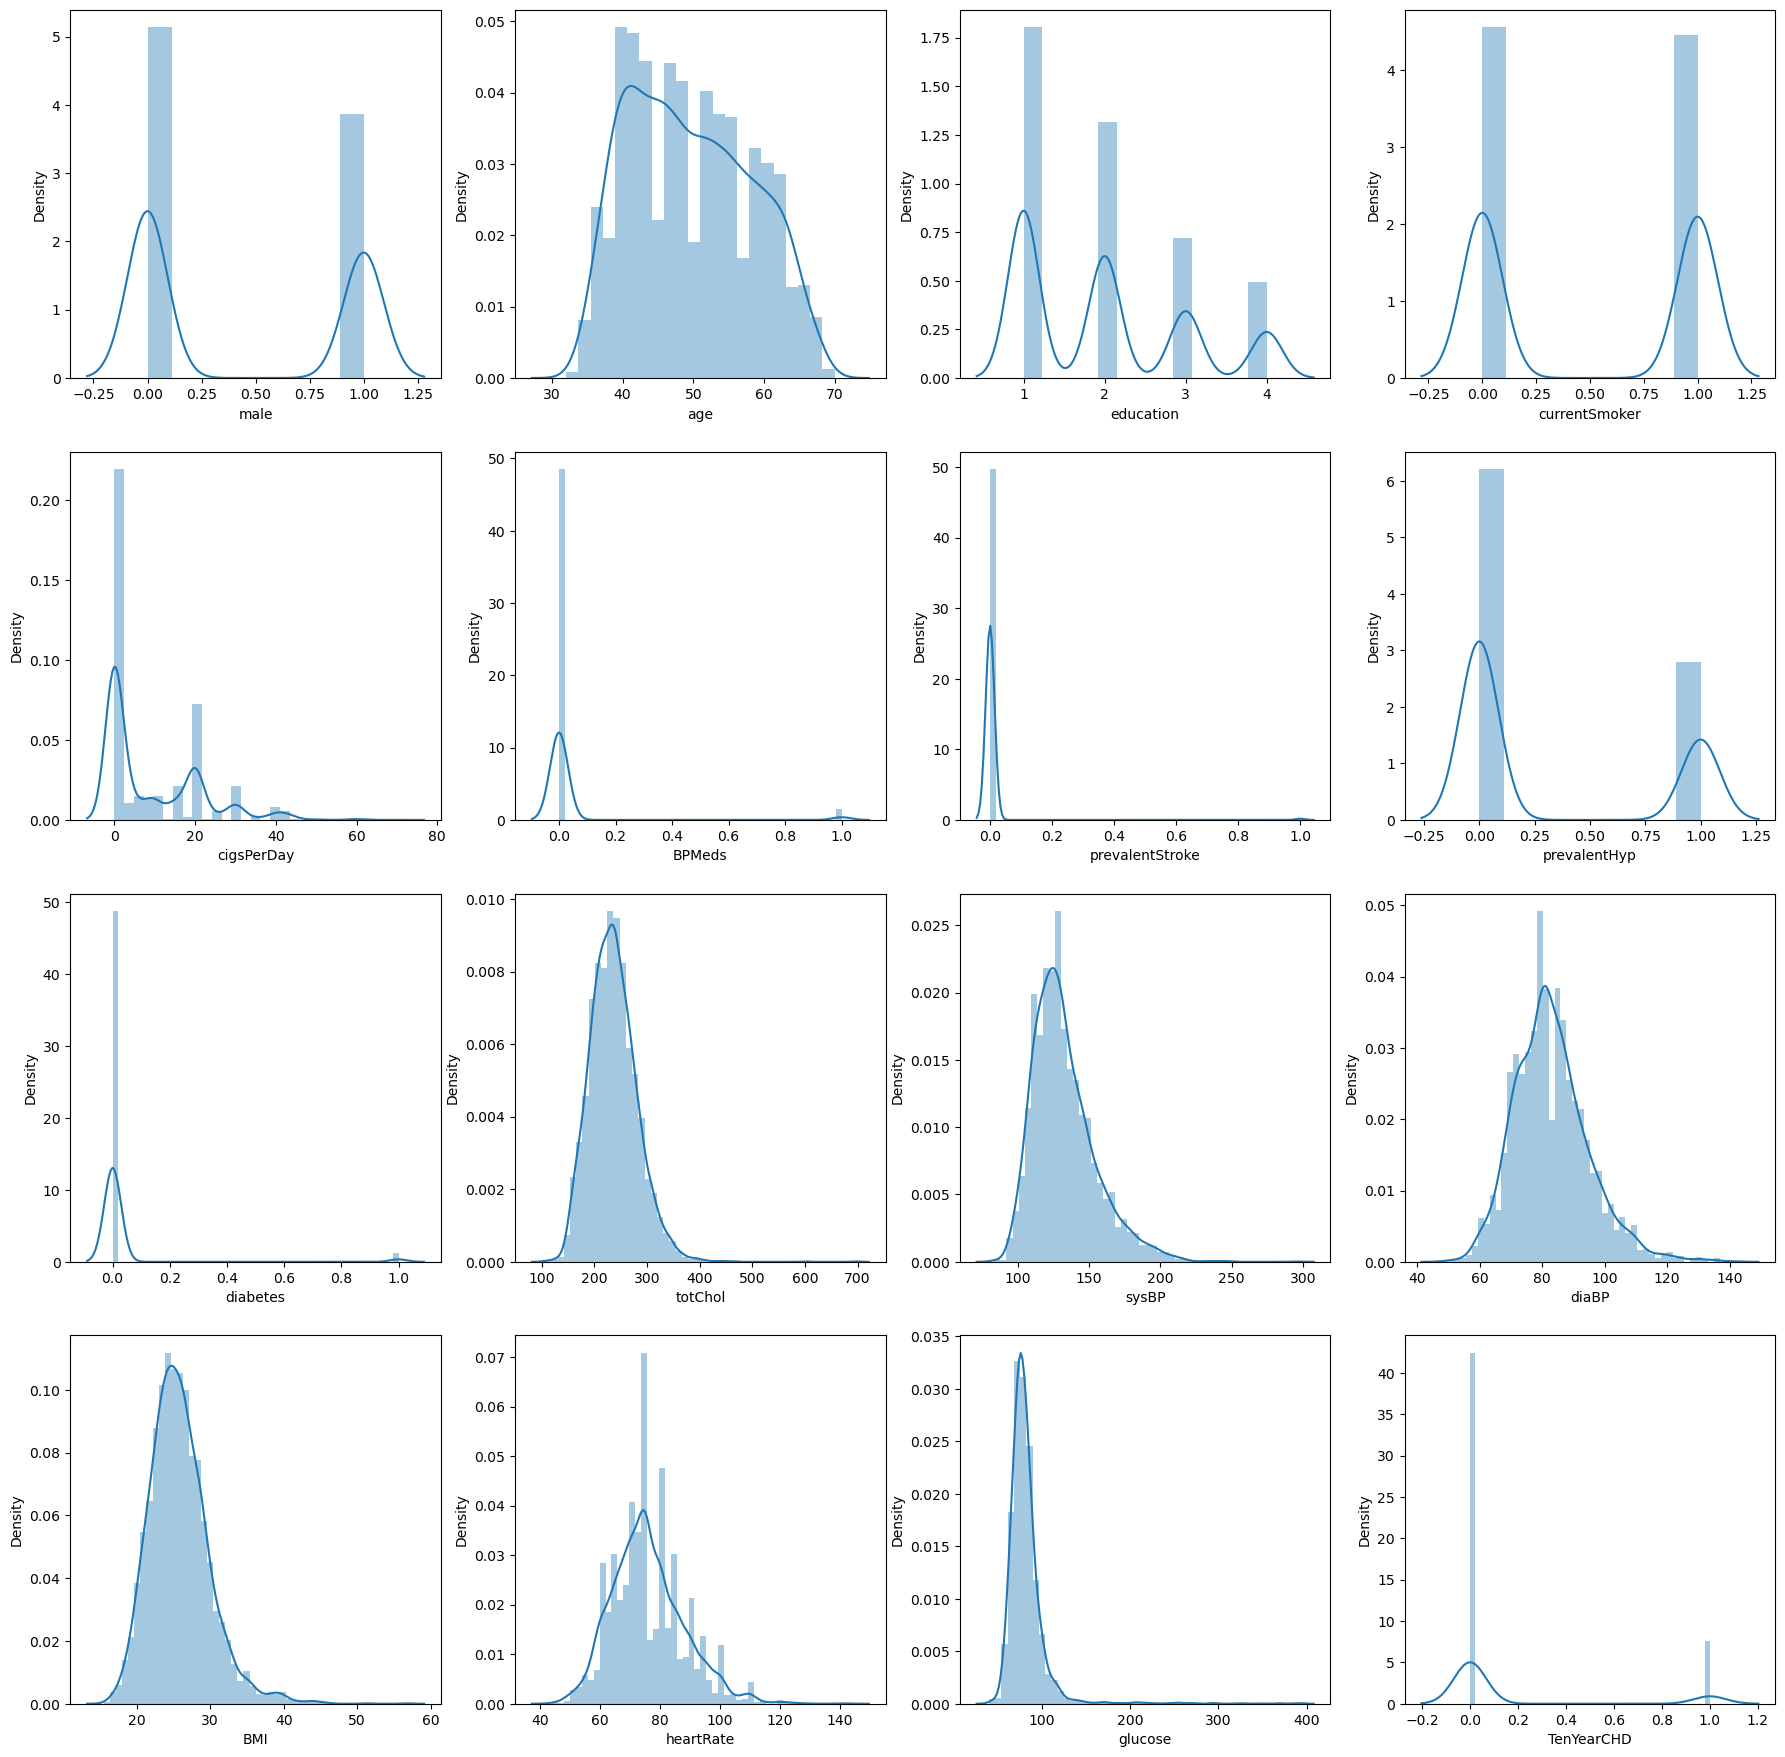

In [44]:
# Grafica edad
plt.figure(figsize = (22,22))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.distplot(dataRegresionLogistica[dataRegresionLogistica.columns.to_list()[i-1]],hist = True)

In [46]:
# Se Comprueba la correlación con la columna de destino

Principal_dataRegresionLogistica.corrwith(dataRegresionLogistica["TenYearCHD"])*100

BMI                  7.467997
BPMeds               8.677417
TenYearCHD         100.000000
age                 22.525610
cigsPerDay           5.777482
currentSmoker        1.945627
diaBP               14.529910
diabetes             9.731651
education           -5.338353
glucose             11.880882
heartRate            2.289752
male                 8.842757
prevalentHyp        17.760273
prevalentStroke      6.180995
sysBP               21.642904
totChol              8.162410
dtype: float64

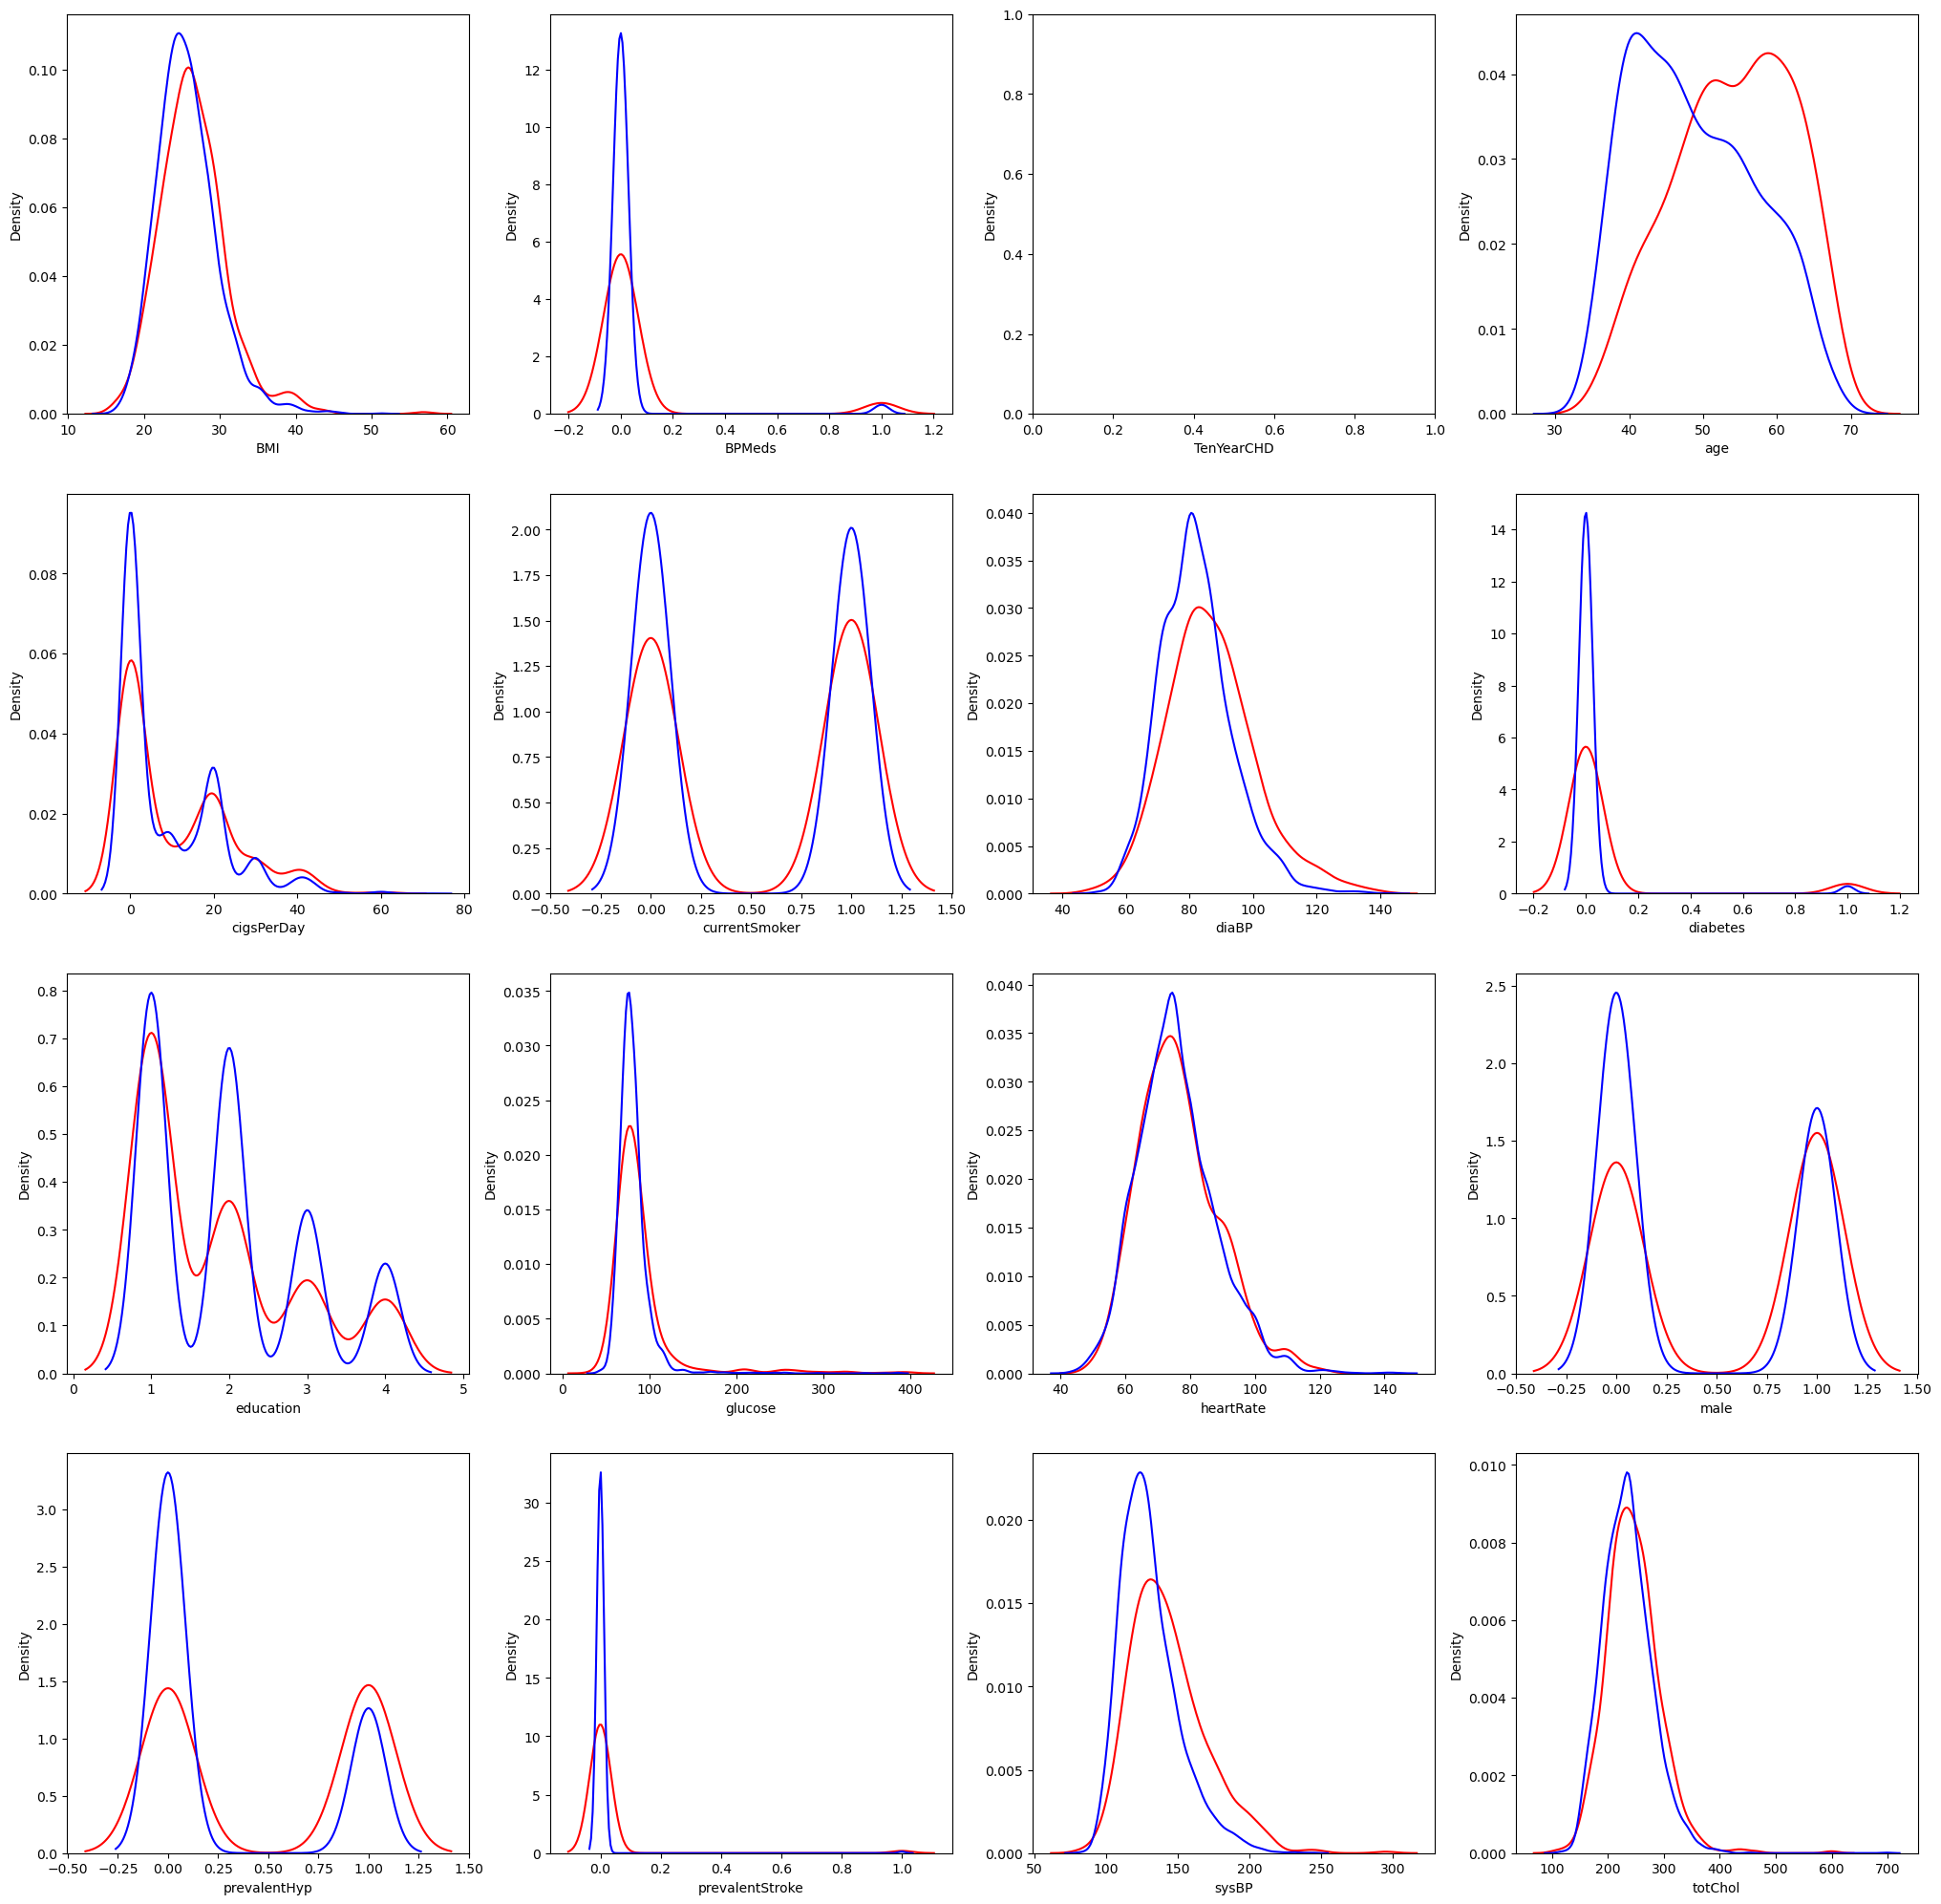

In [52]:
# Se grafican los TenYearCHD
plt.figure(figsize=(25,25))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.distplot(Principal_dataRegresionLogistica[Principal_dataRegresionLogistica["TenYearCHD"]==1][Principal_dataRegresionLogistica.columns.to_list()[i-1]],hist=False,color='red')
    sns.distplot(Principal_dataRegresionLogistica[Principal_dataRegresionLogistica["TenYearCHD"]==0][Principal_dataRegresionLogistica.columns.to_list()[i-1]],hist=False,color='blue')

<Figure size 2200x2200 with 0 Axes>

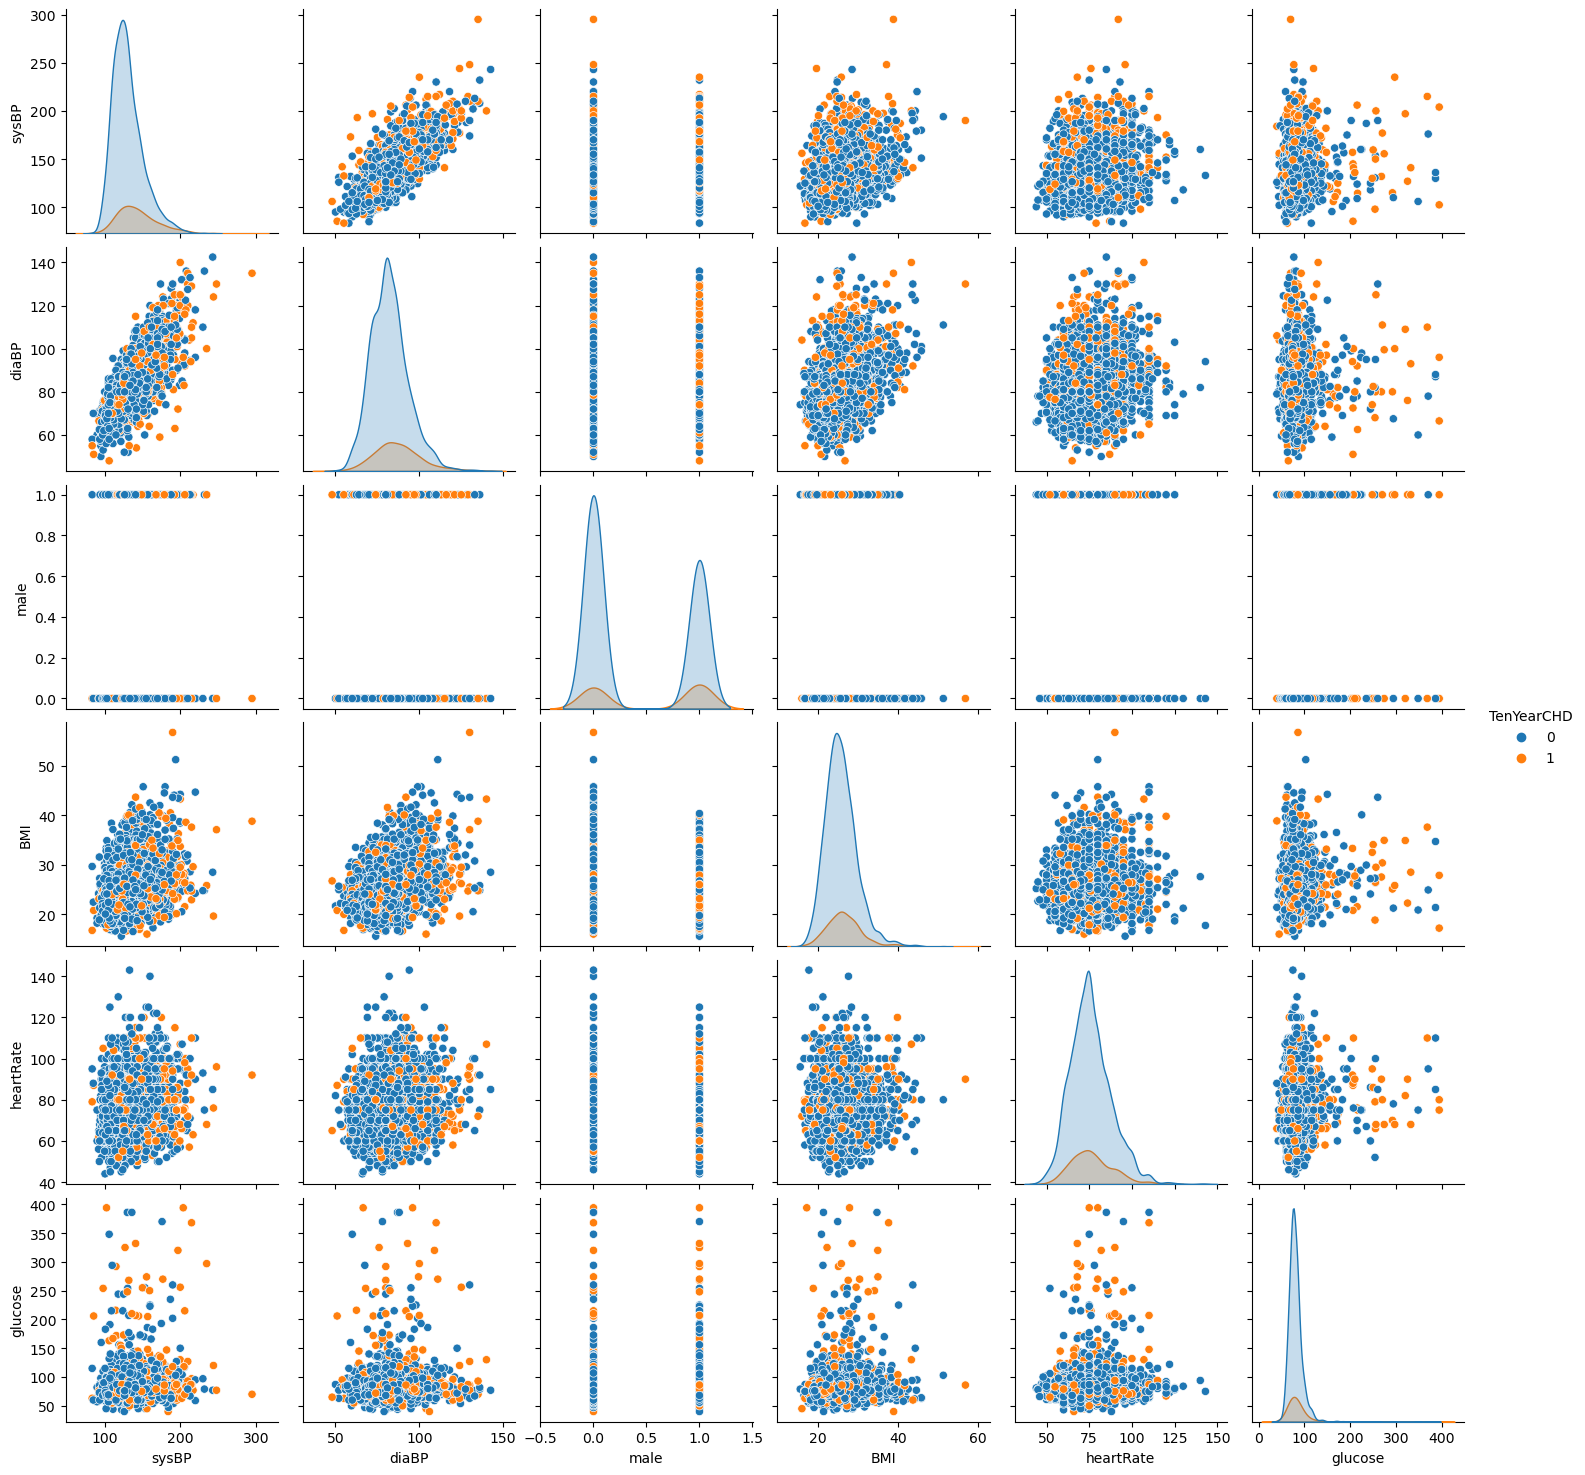

In [54]:
# 
dataRL = Principal_dataRegresionLogistica[[  "sysBP", "diaBP", "male", "BMI", "heartRate", "glucose", "TenYearCHD"]]
plt.figure(figsize = (22,22))
sns.pairplot(dataRL, hue = "TenYearCHD")

<Figure size 2200x2200 with 0 Axes>

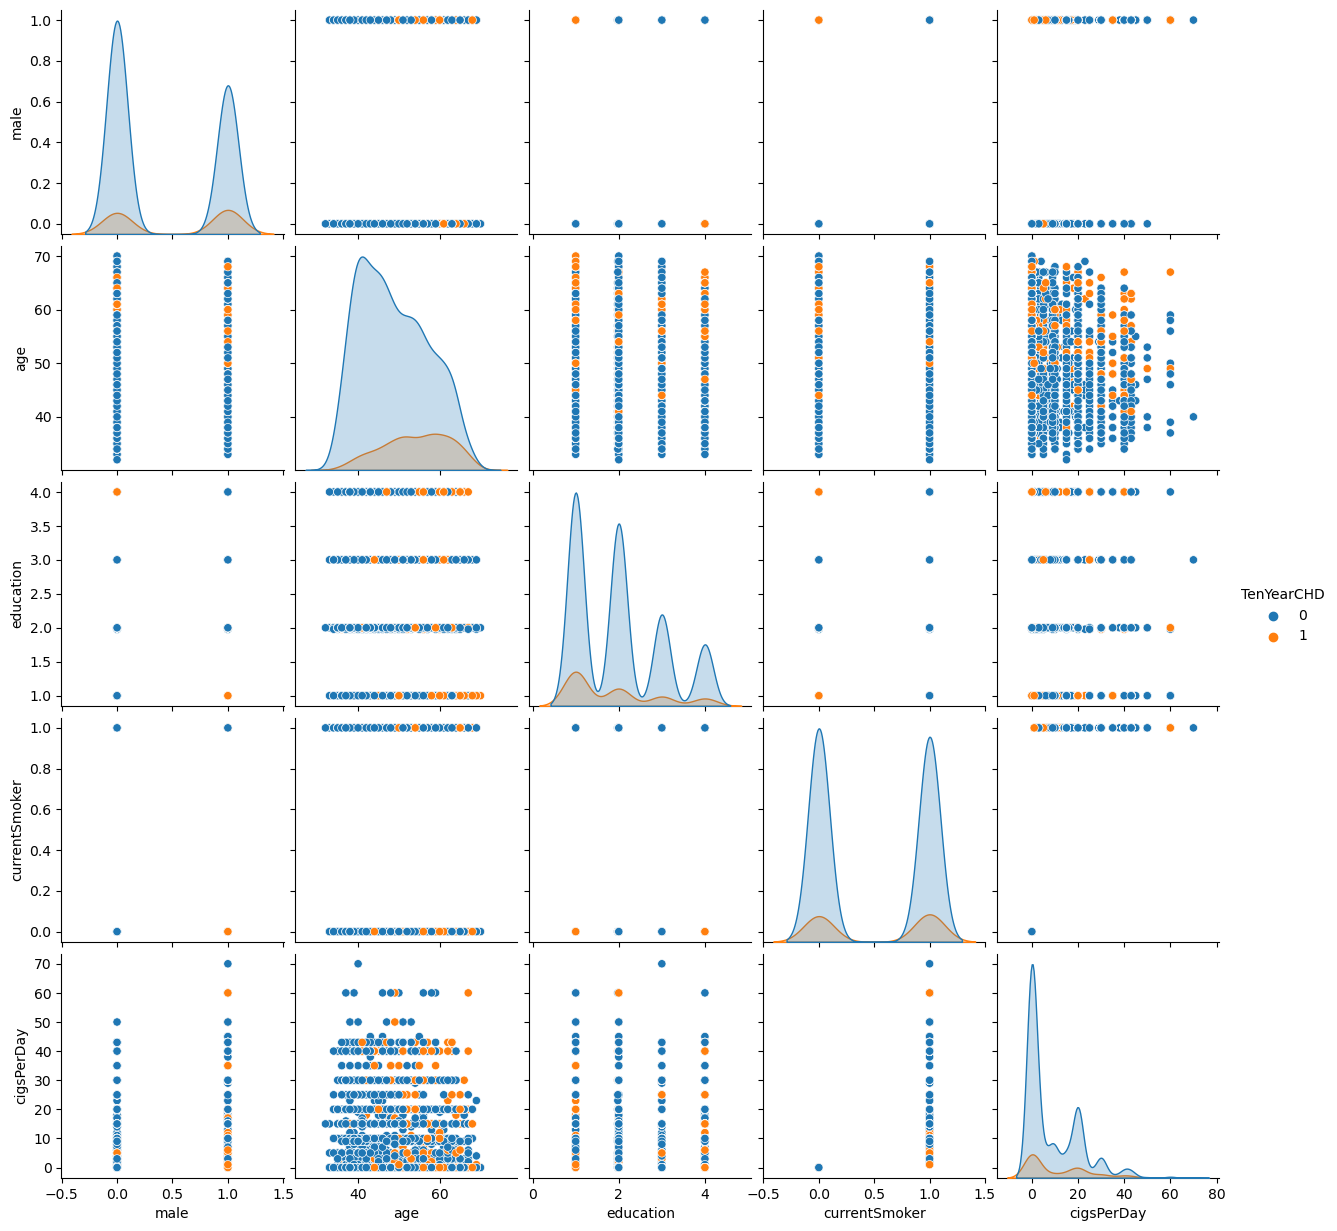

In [56]:

dataRegresionL = Principal_dataRegresionLogistica[["male", "age", "education", "currentSmoker", "cigsPerDay", "TenYearCHD"]]
plt.figure(figsize = (22,22))
sns.pairplot(dataRegresionL,hue = "TenYearCHD")

In [14]:
# se realiza el preprocesamiento, cargando los modelos de datos
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split


In [21]:
# Se realiza la técnica de discretización 
datakb = KBinsDiscretizer(n_bins = 3, encode="ordinal", strategy = "quantile",)
Principal_dataRegresionLogistica["age"]=datakb.fit_transform(Principal_dataRegresionLogistica[["age"]])


NameError: name 'Principal_dataRegresionLogistica' is not defined